# Tasca M8 T01: Exercicis d'algorismes d'Agrupació.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import scipy.stats as stats

In [2]:
# Llegir l'arxiu
rawfb = pd.read_csv("C:/Users/Patricia/Downloads/Publicacions Facebook Thailandia.csv")

In [3]:
# configurar els gràfics
sns.set_style('whitegrid')
sns.set_palette('flare')

In [4]:
rawfb

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


Partim de què sabem que es una base de dades de publicacions de Facebook a Tailàndia, que té 7050 files i 16 columnes, les columnes són:
- **status_id** : identificador únic per a cada publicació.
- **status_type** : tipus de publicació.
- **status_published** : data i hora en la que s' ha realitzat la publicació.
- **num_reactions** : quantitat total de reaccions que ha rebut la publicació.
- **num_comments** quantitat total de comentaris que ha rebut una publicació.
- **num_shares** quantitat total de vegades que una publicació ha sigut compartida.
- **num_likess** quantitat total de likes que ha rebut una publicació.
- **num_wows** quantitat total de wows que ha rebut una publicació.
- **num_hahas** quantitat total de hahas que ha rebut una publicació.
- **num_sads** quantitat total de comentaris que ha rebut una publicació.
- **num_angrys** quantitat total de comentaris que ha rebut una publicació.

In [5]:
# També veiem que hi ha cuatre columnes que son totalment buides.
rawfb[['Column1', 'Column2', 'Column3', 'Column4']].isnull().sum()

Column1    7050
Column2    7050
Column3    7050
Column4    7050
dtype: int64

In [6]:
fb = pd.DataFrame(rawfb)

### Neteja

###### Duplicats

El que seria més important és veure els id que són els identificadors, no haurien de coincidir però ho mirem

In [7]:
fb['status_id'].duplicated().sum() 

53

###### Transformacions

In [8]:
fb['status_published'] # Dividim aquesta columna

0        4/22/2018 6:00
1       4/21/2018 22:45
2        4/21/2018 6:17
3        4/21/2018 2:29
4        4/18/2018 3:22
             ...       
7045     9/24/2016 2:58
7046    9/23/2016 11:19
7047    9/21/2016 23:03
7048     9/20/2016 0:43
7049    9/10/2016 10:30
Name: status_published, Length: 7050, dtype: object

In [9]:
# Dividir la columna en data i hora
fb[['date_published', 'time_published']] = fb['status_published'].str.split(' ', expand=True)

# Convertir la columna de data a format datetime
fb['date_published'] = pd.to_datetime(fb['date_published'])
fb['time_published'] = pd.to_datetime(fb['time_published'], format='%H:%M').dt.time

###### i per acabar eliminem

In [10]:
fb.drop_duplicates(subset='status_id', inplace=True)

In [11]:
fb = fb.drop(['Column1', 'Column2', 'Column3', 'Column4','status_published'], axis=1)

###### Reorganitzar

In [12]:
# Ordenar per der data i hora
fb = fb.sort_values(['date_published', 'time_published'])
display(fb['date_published'], fb['time_published'])

2634   2012-07-15
2633   2012-07-15
2632   2012-07-15
2631   2012-07-15
2630   2012-07-15
          ...    
4734   2018-06-12
4733   2018-06-12
4732   2018-06-13
4731   2018-06-13
4730   2018-06-13
Name: date_published, Length: 6997, dtype: datetime64[ns]

2634    02:51:00
2633    02:58:00
2632    03:32:00
2631    03:42:00
2630    03:54:00
          ...   
4734    22:55:00
4733    23:15:00
4732    00:58:00
4731    00:59:00
4730    01:12:00
Name: time_published, Length: 6997, dtype: object

### Anàlisi exploratori

In [13]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997 entries, 2634 to 4730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status_id       6997 non-null   object        
 1   status_type     6997 non-null   object        
 2   num_reactions   6997 non-null   int64         
 3   num_comments    6997 non-null   int64         
 4   num_shares      6997 non-null   int64         
 5   num_likes       6997 non-null   int64         
 6   num_loves       6997 non-null   int64         
 7   num_wows        6997 non-null   int64         
 8   num_hahas       6997 non-null   int64         
 9   num_sads        6997 non-null   int64         
 10  num_angrys      6997 non-null   int64         
 11  date_published  6997 non-null   datetime64[ns]
 12  time_published  6997 non-null   object        
dtypes: datetime64[ns](1), int64(9), object(3)
memory usage: 765.3+ KB


In [14]:
fb['status_type'].value_counts()

photo     4242
video     2333
status     359
link        63
Name: status_type, dtype: int64

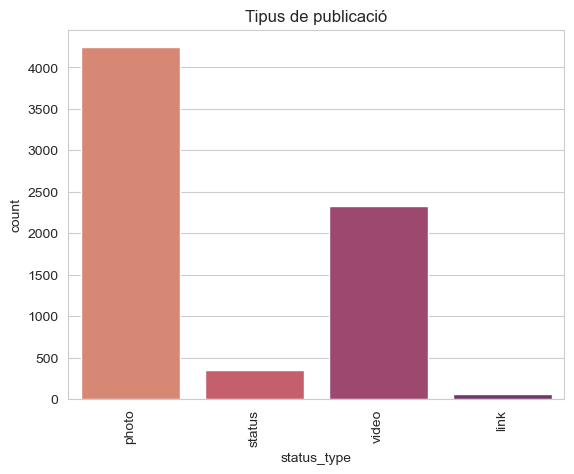

In [15]:
# Tipus de publicacions
sns.countplot(data=fb, x='status_type', palette='flare')
plt.title('Tipus de publicació')
plt.xticks(rotation=90)
plt.show()

    Veiem que el tipus de publicació més comú es photo, seguit de video, status i per últim link

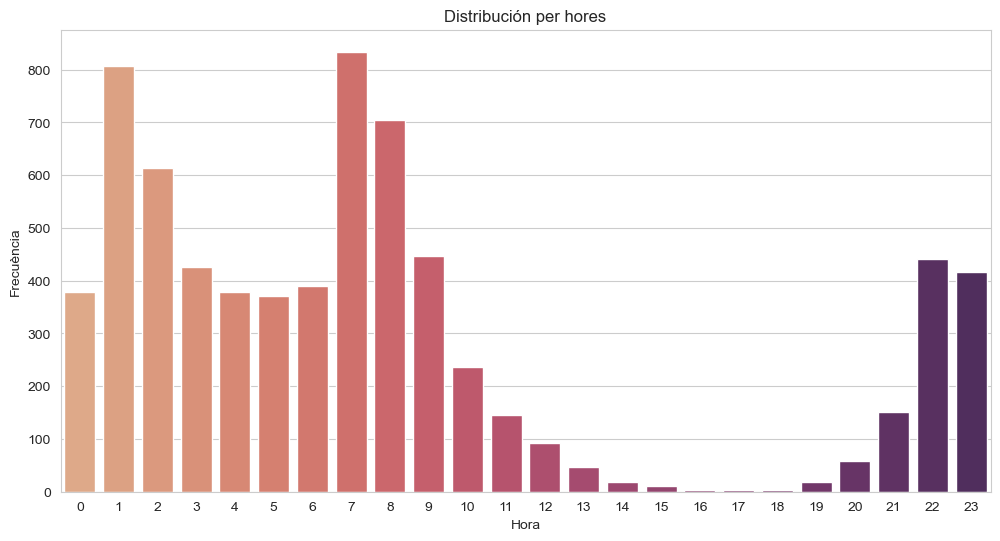

In [16]:
# Obtenir les frecuències
hour_counts = fb.groupby(fb['time_published'].apply(lambda x: x.hour)).size()

# Crear el gràfic
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='flare')

# Configurar les etiquetes
plt.xlabel('Hora')
plt.ylabel('Frecuència')
plt.title('Distribución per hores')

# Mostrar el gràfico
plt.show()

    Hi ha més activitat desde principis de la nit (19h) que varien durant la matinada i baixen al migdia mantenint-se quasi nuls durant la tarda, seria important saber-hi en quin fus horari són aquestes dades degut a que no sembla que sigui el de Tailàndia

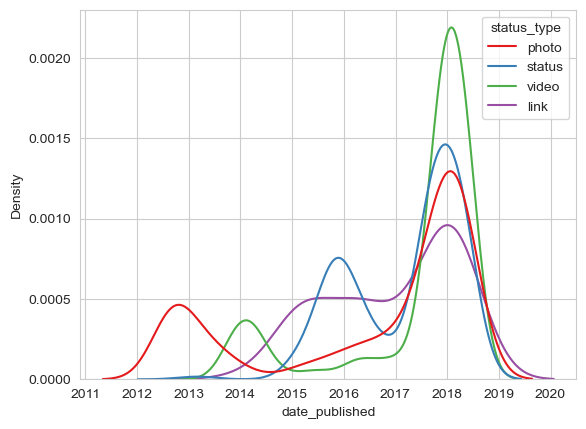

In [17]:
# També podem veure la progressió dels tipus de publicació segons l'any

sns.kdeplot(x='date_published', hue ='status_type', data=fb, common_norm = False, palette="Set1") #Degut a la gran quantitat de valors és important
sns.set(rc = {'figure.figsize' :(11.7,8.27)})

    Veiem que els posts creixen exponencialment fins arribar al punt més alt a 2018 on abunden més els videos, seguits del status, photos i per útlim els link

### Preprocessat

Revisem la distribució

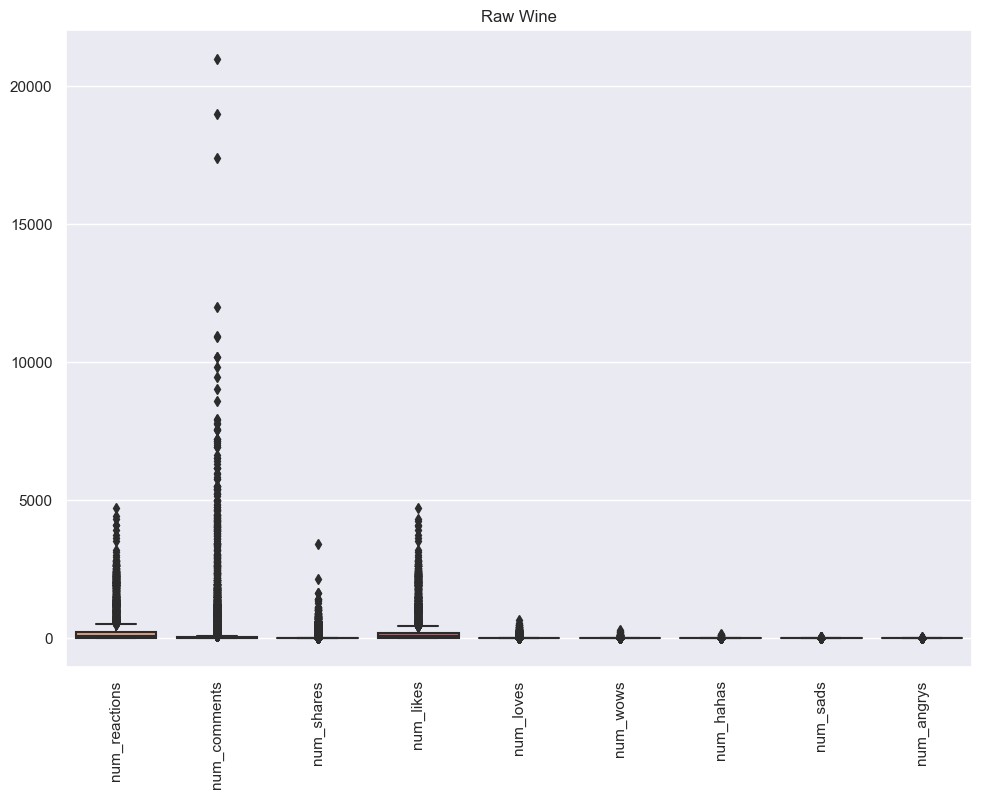

In [18]:
# A tot el dataset
sns.boxplot(data=fb, palette='flare')
plt.title('Raw Wine')
plt.xticks(rotation=90)
plt.show()

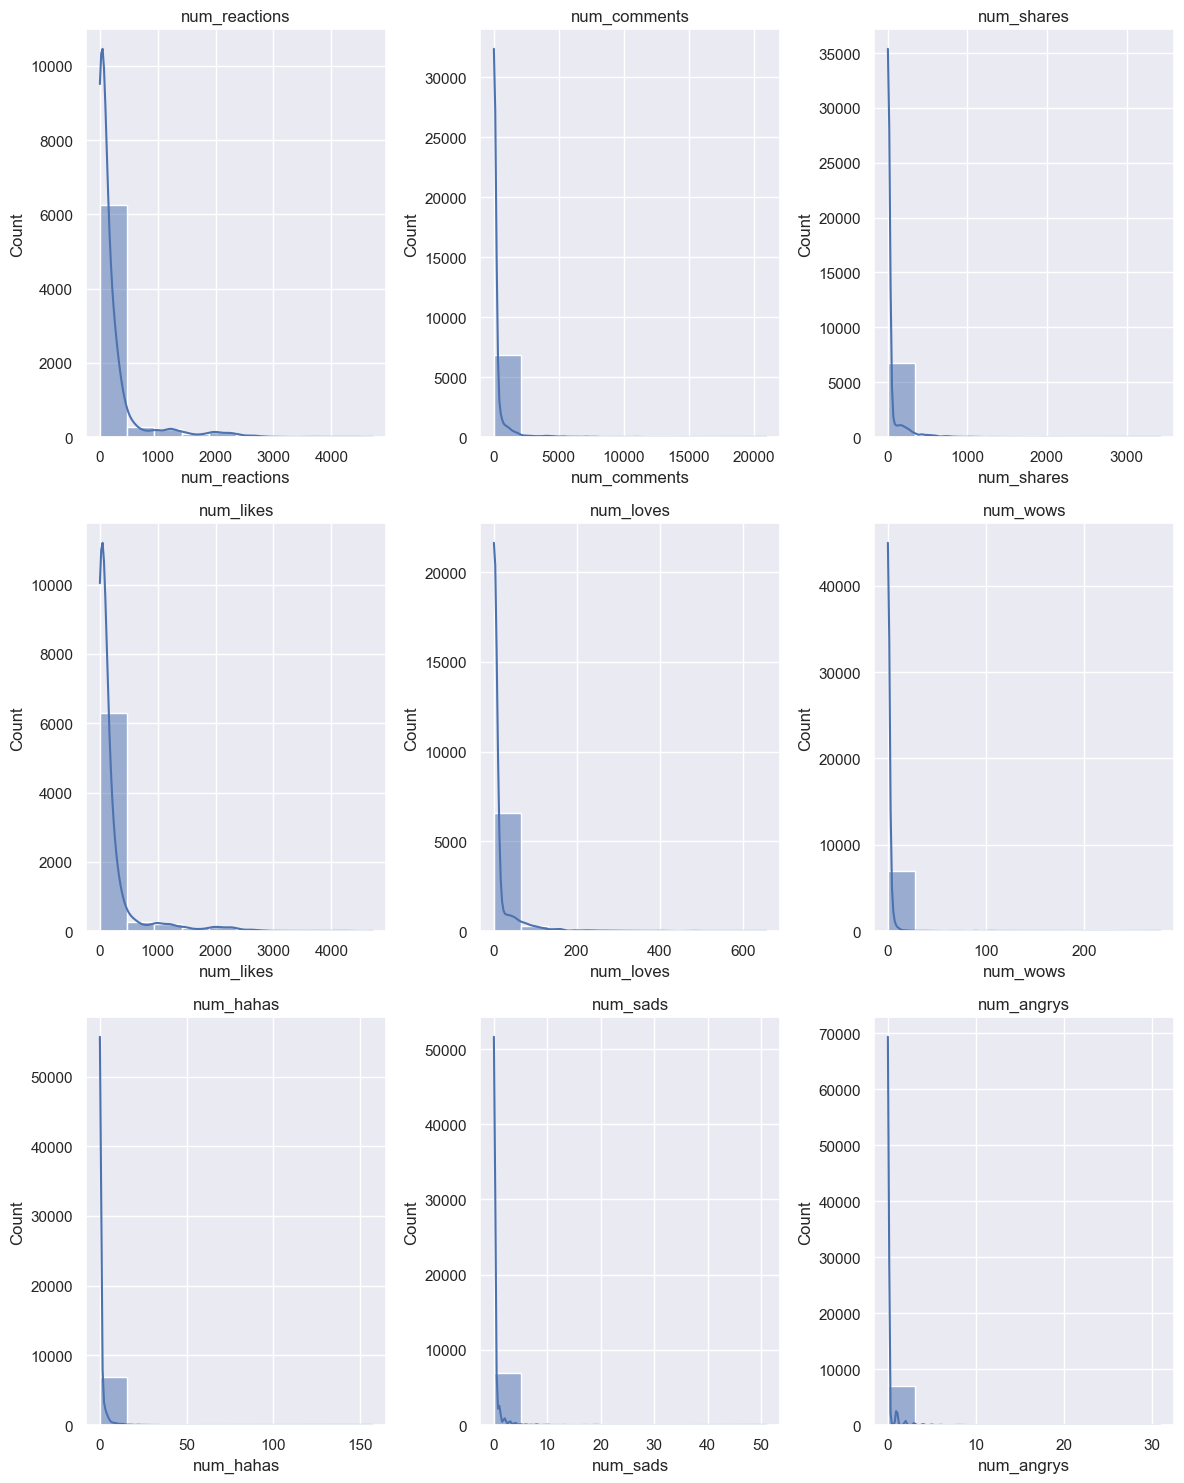

In [19]:
# Crear una figura i eixos per als subplots
fig, axs = plt.subplots((len(fb.columns[2:11]) + 2) // 3, min(len(fb.columns[2:11]), 3), figsize=(12, 15))

# Iterar sobre les columnes i generar els histogrames
for i, columna in enumerate(fb.columns[2:11]):
    # Generar l'histograma per a la columna actual
    sns.histplot(data=fb, x=columna, bins=10, kde=True, ax=axs[i // min(len(fb.columns[2:11]), 3), i % min(len(fb.columns[2:11]), 3)])

    # Establir el títol de la columna a l'histograma
    axs[i // min(len(fb.columns[2:11]), 3), i % min(len(fb.columns[2:11]), 3)].set_title(columna)

# Ajustar l'espai entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Tenim clar que és impossible que la distribució sigui normal i hi ha outliers llavors caldrà fer-li **Robust Scaler**

##### Robust Scaler

In [20]:
from sklearn.preprocessing import RobustScaler
fb[['num_reactions', 'num_comments','num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas','num_sads', 'num_angrys']] = RobustScaler().fit_transform(fb[['num_reactions', 'num_comments','num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas','num_sads', 'num_angrys']])

##### Codificació cíclica

La codificació cíclica és una tècnica utilitzada per representar variables categòriques que tenen una naturalesa cíclica, com els mesos de l' any o els dies de la setmana, de manera que es conservi la informació de periodicitat. La idea principal és utilitzar funcions trigonomètriques com el si i el cosinus per crear noves variables numèriques que capturin la periodicitat de la variable original.

###### Data

In [21]:
fb['YRday_published'] = fb['date_published'].dt.dayofyear # Dia de l'any sobre 365-366
fb['month_published'] = fb['date_published'].dt.month
fb['year_published'] = fb['date_published'].dt.year

In [22]:
# Obtenim sens i cosins pel month
fb['month_sin'] = np.sin(2 * np.pi * fb['month_published'] / 12)
fb['month_cos'] = np.cos(2 * np.pi * fb['month_published'] / 12)

    Ara per obtenir els sens i cosins dels dias per any hem de tenir en compte que les nostres dades van de 2012 a 2018 i tindriem dos anys bisiestos (de traspàs), això ens fa haver de ver la divisió entre 366 enlloc de entre 365

In [23]:
fb['day_sin'] = np.where((fb['year_published'] == 2012) | (fb['year_published'] == 2016),
                         np.sin(2 * np.pi * fb['YRday_published'] / 366),
                         np.sin(2 * np.pi * fb['YRday_published'] / 365))

fb['day_cos'] = np.where((fb['year_published'] == 2012) | (fb['year_published'] == 2016),
                         np.cos(2 * np.pi * fb['YRday_published'] / 366),
                         np.cos(2 * np.pi * fb['YRday_published'] / 365))

###### Hora

In [24]:
# Convertir la columna "time_published" a formato de tiempo
fb['time_published'] = pd.to_datetime(fb['time_published'], format='%H:%M:%S').dt.time
# Extraer las horas y los minutos en columnas separadas
fb['hour_published'] = fb['time_published'].apply(lambda x: x.hour)
fb['minute_published'] = fb['time_published'].apply(lambda x: x.minute)

In [25]:
# Obtenim sens i cosins per hora
fb['hour_sin'] = np.sin(2 * np.pi * fb['hour_published'] / 24)
fb['hour_cos'] = np.cos(2 * np.pi * fb['hour_published'] / 24)

In [26]:
# Obtenim sens i cosins per minuts
fb['minute_sin'] = np.sin(2 * np.pi * fb['minute_published'] / 60)
fb['minute_cos'] = np.cos(2 * np.pi * fb['minute_published'] / 60)

##### LabelEncoder 
És una mena de preprocessament en scikit-learn que s' utilitza per transformar variables categòriques en valors numèrics. La codificació numèrica és necessària perquè molts algorismes d' aprenentatge automàtic requereixen que les variables d' entrada siguin numèriques

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fb['ENCODED_status_type'] = le.fit_transform(fb['status_type'])

In [28]:
# obtenir la correspondència
for category, encoded_value in zip(le.classes_, le.transform(le.classes_)):
    print(f"{category} : {encoded_value}")

link : 0
photo : 1
status : 2
video : 3


In [29]:
fb.columns

Index(['status_id', 'status_type', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys', 'date_published', 'time_published',
       'YRday_published', 'month_published', 'year_published', 'month_sin',
       'month_cos', 'day_sin', 'day_cos', 'hour_published', 'minute_published',
       'hour_sin', 'hour_cos', 'minute_sin', 'minute_cos',
       'ENCODED_status_type'],
      dtype='object')

###### Organitzar el nostre dataset cronologicament

In [30]:
# Ordenar per der data i hora
fb = fb.sort_values(['year_published', 'YRday_published','hour_published','minute_published'])

###### i reorganitzem les columnes

In [31]:
fb = fb[['status_id','status_type','ENCODED_status_type','date_published',
         'year_published','month_published','month_sin','month_cos',
         'YRday_published','day_sin','day_cos','time_published','hour_published', 
         'hour_sin','hour_cos','minute_published','minute_sin','minute_cos','num_reactions', 
         'num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']]

# Verificar
print(fb.columns)

Index(['status_id', 'status_type', 'ENCODED_status_type', 'date_published',
       'year_published', 'month_published', 'month_sin', 'month_cos',
       'YRday_published', 'day_sin', 'day_cos', 'time_published',
       'hour_published', 'hour_sin', 'hour_cos', 'minute_published',
       'minute_sin', 'minute_cos', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys'],
      dtype='object')


Com tenim clar que farem clusters més endavant treiem tot el que no fàrem servir

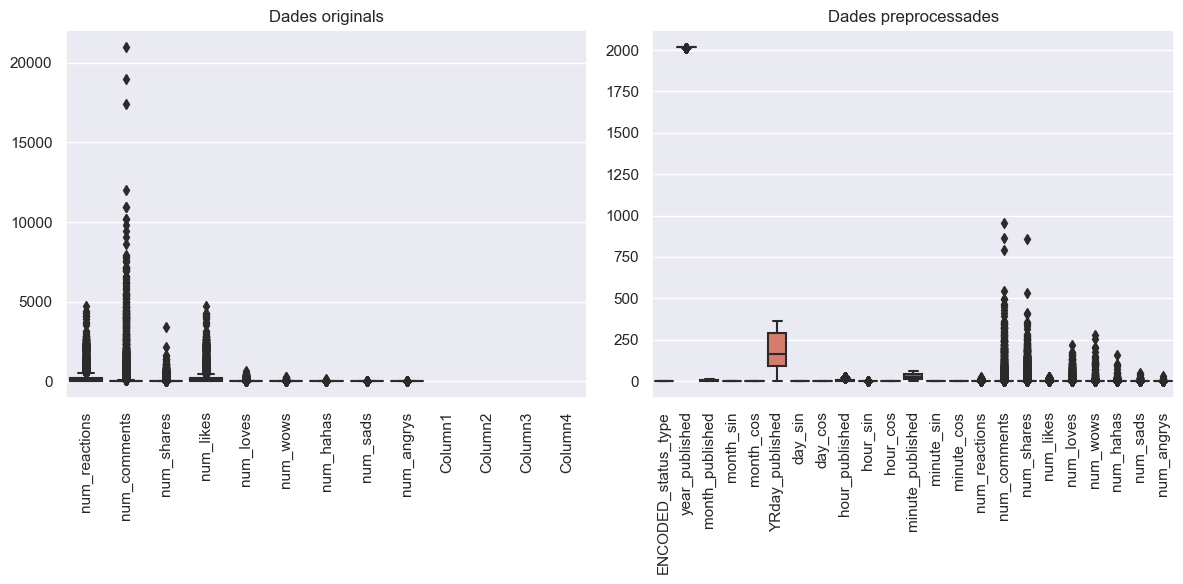

In [32]:
# Gràfic comparatiu

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot del dataset original
sns.boxplot(data=rawfb, ax=axes[0], palette='flare')
axes[0].set_title('Dades originals')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Boxplot del dataset modificat
sns.boxplot(data=fb, ax=axes[1], palette='flare')
axes[1].set_title('Dades preprocessades')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [33]:
fb2 = fb[['ENCODED_status_type','year_published',
         'month_sin','month_cos','day_sin','day_cos','hour_sin','hour_cos',
         'minute_sin','minute_cos','num_reactions','num_comments','num_shares',
         'num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']]

In [34]:
fb3 = fb2.copy() # Necessitarem una còpia per tornar a fer una reducció de dimensionalitat per si hem de canviar els components

##### Funcions

És defineix la funció avaluar_clustering que pràcticament fa tot el treball del exercici 3, avalua un model de clustering i proporciona mètriques d'avaluació, així com detecta anomalies en les dades. Les mètriques inclouen coeficient de silueta, índex de Davies-Bouldin, índex Calinski-Harabasz, coeficient cophenetic, WCSS i BCSS. S'utilitzen els algorismes IsolationForest i LocalOutlierFactor per a la detecció d'anomalies segons sigui adient. Els resultats es retornen en un DataFrame.

In [35]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import cophenet, linkage
from scipy.spatial.distance import pdist
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

def avaluar_clustering(tipo_clustering, model, dades, metriques=None, nom_model=None):
    # Inicialitzar les mètriques com a NaN
    metrics = {
        'Model': [nom_model],
        'Coeficient de Silueta': [np.nan],
        'Índex de Davies-Bouldin': [np.nan],
        'Índex Calinski-Harabasz': [np.nan],
        'Coeficient Cophenetic': [np.nan],
        'WCSS': [np.nan],
        'BCSS': [np.nan],
        'Anomalies': [np.nan]
    }

    try:
        if tipo_clustering == 'k':
            # Realitzar el clustering K-means i obtenir els resultats
            resultats_clustering = model.labels_

            # Obtenir els centreides dels clusters
            centreides = model.cluster_centers_

            # Calcular la distància euclidiana al quadrat entre les dades i els centreides
            distancies_quadrat = np.square(euclidean_distances(dades, centreides))

            # Calcular les mètriques específiques del K-means
            metrics['Coeficient de Silueta'] = [silhouette_score(dades, resultats_clustering)]
            metrics['Índex de Davies-Bouldin'] = [davies_bouldin_score(dades, resultats_clustering)]
            metrics['Índex Calinski-Harabasz'] = [calinski_harabasz_score(dades, resultats_clustering)]

            # Calcular el WCSS i BCSS
            metrics['WCSS'] = [np.sum(distancies_quadrat[np.arange(len(dades)), resultats_clustering])]
            metrics['BCSS'] = [np.sum(distancies_quadrat) - metrics['WCSS'][0]]

            # Detecció d'anomalies
            outliers = IsolationForest().fit_predict(dades)
            metrics['Anomalies'] = [np.sum(outliers == -1)]
        elif tipo_clustering == 'g':
            # Realitzar el clustering jeràrquic aglomeratiu
            linkage_matrix = linkage(dades, method='complete', metric='euclidean')

            # Calcular el coeficient de correlació cophenètic
            metrics['Coeficient Cophenetic'], _ = cophenet(linkage_matrix, pdist(dades))

            # Calcular les mètriques específiques del clustering jeràrquic
            metrics['Coeficient de Silueta'] = [silhouette_score(dades, model.labels_)]
            metrics['Índex de Davies-Bouldin'] = [davies_bouldin_score(dades, model.labels_)]
            metrics['Índex Calinski-Harabasz'] = [calinski_harabasz_score(dades, model.labels_)]

            # Detecció d'anomalies
            outliers = LocalOutlierFactor().fit_predict(dades)
            metrics['Anomalies'] = [np.sum(outliers == -1)]

    except AttributeError as e:
        print(f"Error: {e}")

    # Crear un DataFrame amb les mètriques
    noves_metriques = pd.DataFrame(metrics)

    # Afegir les noves mètriques al DataFrame existent o crear-ne un de nou si no es proporciona cap
    if metriques is None:
        metriques = noves_metriques
    else:
        metriques = pd.concat([metriques, noves_metriques], ignore_index=True)

    return metriques

In [36]:
metriques = pd.DataFrame() 

I altre per fer representacions gràfiques ràpidament en 2D i 3D ambs els centreides

In [37]:
from mpl_toolkits.mplot3d import Axes3D

def plot_clusters(data, labels, cluster_centers, title=None, xlabel=None, ylabel=None):
    # Reducció de dimensionalitat amb PCA a 3 components
    pca = PCA(n_components=3)
    data_pca_3d = pca.fit_transform(data)

    # Gràfic 2D amb punts de dades i centreides
    plt.figure(figsize=(12, 6))
    ax1 = plt.subplot(121)
    ax1.scatter(data[:, 0], data[:, 1], c=labels, cmap='flare')
    ax1.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', c='red', s=100, label='Centreides')
    if title:
        ax1.set_title(title + ' - 2D')
    if xlabel:
        ax1.set_xlabel(xlabel)
    if ylabel:
        ax1.set_ylabel(ylabel)
    ax1.legend()

    # Gràfic 3D amb punts de dades i centreides
    ax2 = plt.subplot(122, projection='3d')
    ax2.scatter(data_pca_3d[:, 0], data_pca_3d[:, 1], data_pca_3d[:, 2], c=labels, cmap='flare', s=50)
    ax2.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='*', c='red', s=100, label='Centreides')
    if title:
        ax2.set_title(title + ' - 3D')
    if xlabel:
        ax2.set_xlabel(xlabel)
    if ylabel:
        ax2.set_ylabel(ylabel)
    ax2.set_zlabel('Eix Z')
    ax2.legend()

    # Mostrar els gràfics
    plt.tight_layout()
    plt.show()


## Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

Tenim doncs que hem de fer PCA

L'Anàlisi de Components Principals (PCA, per les sigles en anglès) és una tècnica de reducció de dimensionalitat que s'utilitza per trobar les característiques més importants o els components principals en un conjunt de dades. El seu objectiu és transformar un conjunt de variables correlacionades en un nou conjunt de variables no correlacionades anomenades components principals.

Primer hem de saber de quants components hem de fer-ho

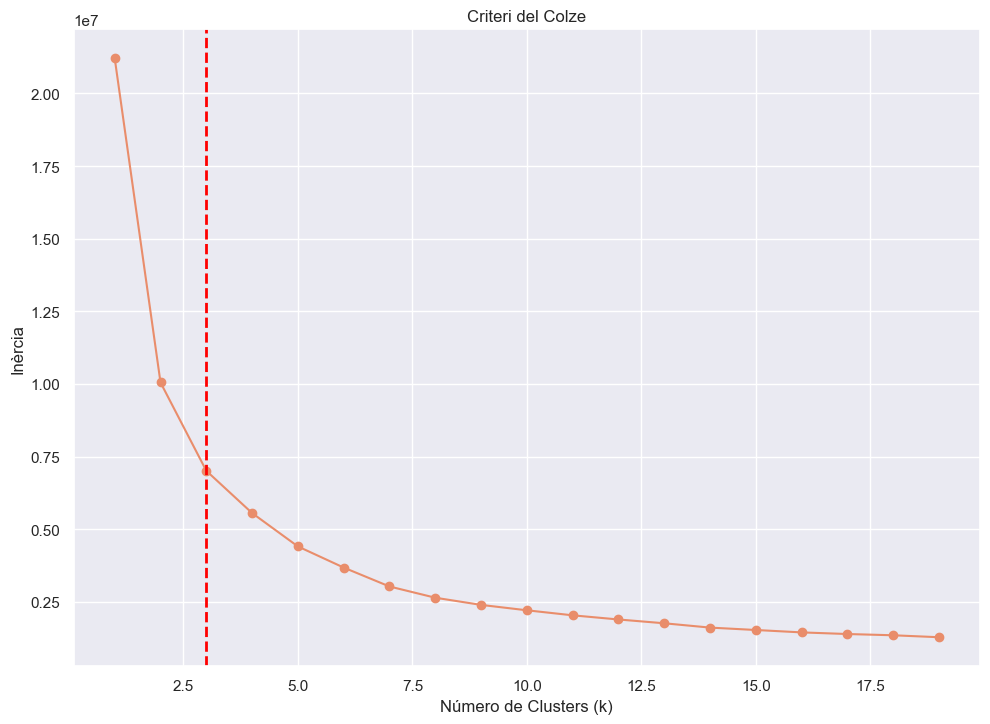

In [38]:
from sklearn.cluster import KMeans

# Crear una llista buida per emmagatzemar les inèrcies
cs = []

# Provar diferents valors de k (número de clusters)
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(fb2)  # fb2 és el teu DataFrame de dades

    # Calcular la inèrcia i afegir-la a la llista
    cs.append(kmeans.inertia_)

# Traçar la corba de la inèrcia en funció del número de clusters
plt.plot(range(1, 20), cs, marker='o', linestyle='-', color=sns.color_palette('flare')[0])
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inèrcia')
plt.title('Criteri del Colze')

# Afegir la línia vertical en k=3
plt.axvline(x=3, ymin=0, color='red', linewidth=2, ls='--')

plt.show()

El colze desaccelera al dos, tot i això anem a mirar-ho amb silhouette

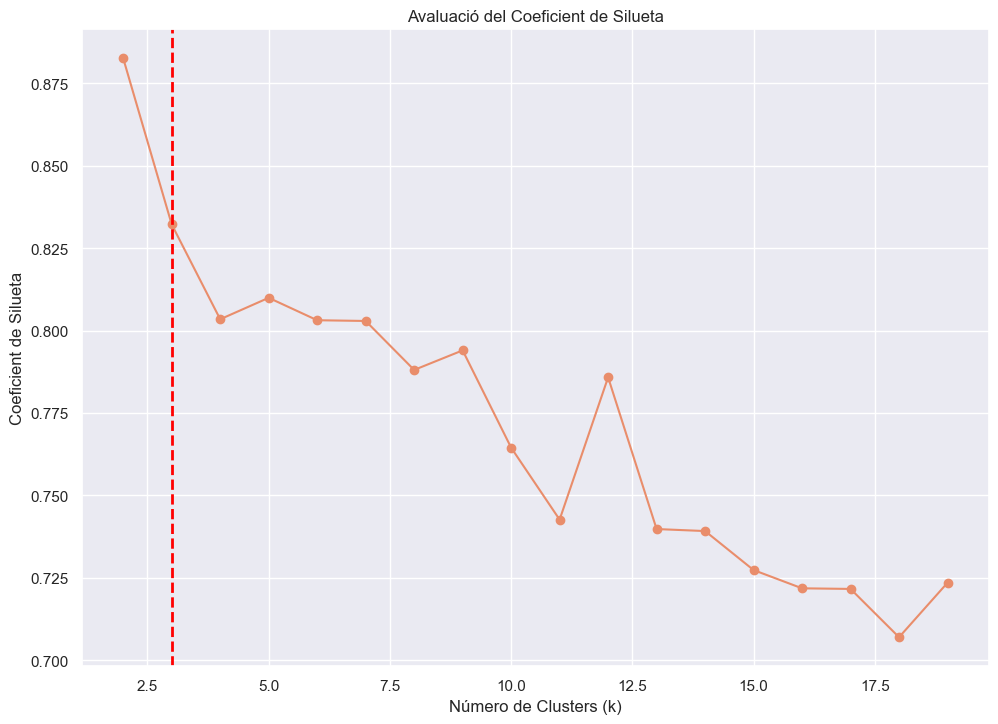

In [39]:
# Crear una llista buida per emmagatzemar els valors del coeficient de silueta
s_scores = []

# Provar diferents valors de k (número de clusters)
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(fb2)  # fb2 és el teu DataFrame de dades

    # Calcular el coeficient de silueta i afegir-lo a la llista
    s_score = silhouette_score(fb2, kmeans.labels_)
    s_scores.append(s_score)

# Traçar la corba del coeficient de silueta en funció del número de clusters
plt.plot(range(2, 20), s_scores, marker='o', linestyle='-', color=sns.color_palette('flare')[0])
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficient de Silueta')
plt.title('Avaluació del Coeficient de Silueta')
plt.axvline(x=3, ymin=0, color='red', linewidth=2, ls='--')
plt.show()

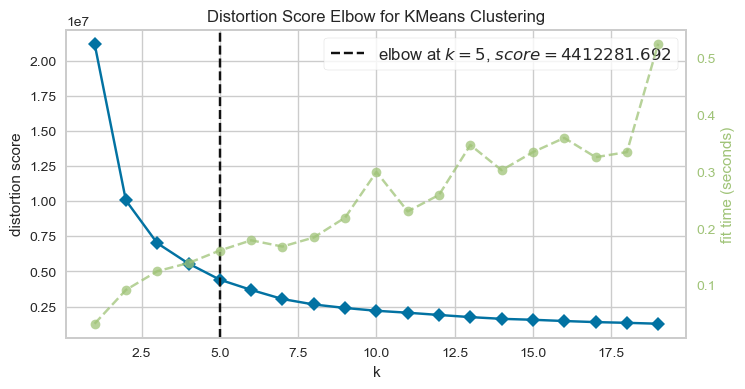

In [40]:
from yellowbrick.cluster import KElbowVisualizer

# Crear una instància del model de clustering i del visualizer
plt.figure(figsize=(8, 4))
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1, 20))

visualizer.fit(fb2)  # Ajustar les dades al visualizer
visualizer.show()
plt.show()

Tenint clar que hem de fer tres clústers, començem

In [41]:
print("forma original:", fb2.shape)

forma original: (6997, 19)


In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(fb2)
fb2 = pca.transform(fb2)
print("forma transformada:", fb2.shape)

forma transformada: (6997, 3)


### K Means

K-means és un algorisme de clúster o agrupament que s'utilitza per separar un conjunt de dades en grups o clústers basats en les seves característiques. L'objectiu principal de l'algorisme K-means és agrupar les dades de manera que els punts dins de cada grup siguin similars entre si i els punts en diferents grups siguin diferents.

In [43]:
# Crear una instància del model KMeans amb 3 clusters i 10 inicialitzacions diferents
kmeans = KMeans(n_clusters=3, n_init=10)

kmeans.fit(fb2) # Ajustar el model als dades fb2
cluster_labels = kmeans.labels_ # Obtindre les etiquetes de cluster assignades a cada registre

# Obtindre els centreides dels clusters
cluster_centers = kmeans.cluster_centers_

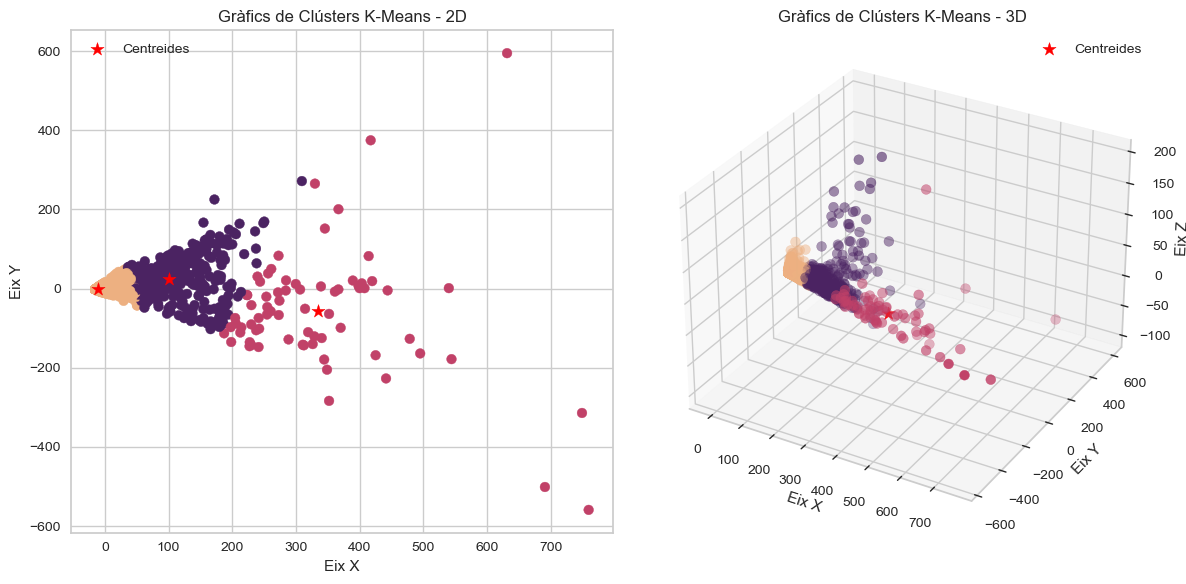

In [44]:
plot_clusters(fb2, cluster_labels, cluster_centers, title='Gràfics de Clústers K-Means', xlabel='Eix X', ylabel='Eix Y')

In [45]:
metriques = avaluar_clustering('k', kmeans, fb2, metriques, 'kmeans')

In [46]:
metriques

,Model,Coeficient de Silueta,Índex de Davies-Bouldin,Índex Calinski-Harabasz,Coeficient Cophenetic,WCSS,BCSS,Anomalies
0,kmeans,0.869805,0.777241,7601.298997,NaN,6.522507e+06,9.392844e+08,762


- Coeficient de Silueta: El coeficient de silueta és una mesura de la qualitat de l'algorisme de clustering. En aquest cas, l'algorisme K-means ha obtingut un coeficient de silueta de 0.869805, el qual indica que els punts estan relativament ben agrupats i són cohesius dins dels seus clústers.

- Índex de Davies-Bouldin: L'índex de Davies-Bouldin és una mesura de la qualitat de l'algorisme de clustering. Un valor més baix indica una millor qualitat de l'agrupació. En aquest cas, l'índex de Davies-Bouldin és de 0.777241, el qual indica una bona separació entre els clústers i una cohesió dels punts dins de cada clúster.

- Índex Calinski-Harabasz: L'índex Calinski-Harabasz és una mesura de la separació entre els clústers i la cohesió dins de cada clúster. Un valor més alt indica una millor separació entre els clústers i una millor cohesió dels punts dins de cada clúster. En aquest cas, l'índex Calinski-Harabasz és de 7601.298997, el qual indica una bona separació dels clústers.

- Coeficient Cophenetic: El coeficient Cophenetic és una mesura de la correlació entre la matriu de distàncies original i la matriu de distàncies utilitzada en l'algorisme de clustering. En aquest cas, no s'ha calculat el coeficient Cophenetic i es mostra com a NaN.

- WCSS (Within-Cluster Sum of Squares): WCSS és una mesura de la variabilitat dels punts dins de cada clúster. Un valor més baix indica que els punts dins de cada clúster estan més propers entre si. En aquest cas, el valor de WCSS és de 6.522507e+06.

- BCSS (Between-Cluster Sum of Squares): BCSS és una mesura de la separació entre els clústers. Un valor més alt indica una major separació entre els clústers. En aquest cas, el valor de BCSS és de 9.392844e+08.

- Anomalies: Aquesta columna indica el nombre de punts que s'han identificat com a anomalies en l'algorisme de clustering. En aquest cas, hi ha 762 anomalies detectades.

L'algorisme K-means ha obtingut resultats favorables en termes de separació dels clústers i cohesió dels punts dins de cada clúster, amb una presència relativament baixa d'anomalies.

## Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

##### Definir la quantitat de clusters
Degut a les dades que tenim sabem que hem de fer PCA però pot ser que per Agglomerative Clustering sigui més convenient una altra quantitat de clusters

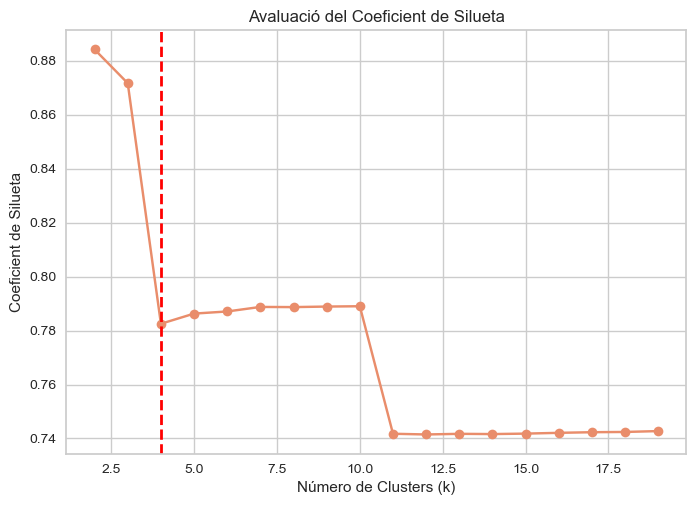

In [47]:
from sklearn.cluster import AgglomerativeClustering

# Crear una llista buida per emmagatzemar els valors del coeficient de silueta
s_scores = []

# Provar diferents valors de k (número de clusters)
for k in range(2, 20):
    agglomerative_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = agglomerative_clustering.fit_predict(fb3)

    # Calcular el coeficient de silueta i afegir-lo a la llista
    s_score = silhouette_score(fb3, cluster_labels)
    s_scores.append(s_score)

# Traçar la corba del coeficient de silueta en funció del número de clusters
plt.plot(range(2, 20), s_scores, marker='o', linestyle='-', color=sns.color_palette('flare')[0])
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficient de Silueta')
plt.title('Avaluació del Coeficient de Silueta')
plt.axvline(x=4, ymin=0, color='red', linewidth=2, ls='--')
plt.show()

Clarament hem de fer tres clusters

In [48]:
print("forma original:", fb3.shape)

forma original: (6997, 19)


In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(fb3)
fb3 = pca.transform(fb3)
print("forma transformada:", fb3.shape)

forma transformada: (6997, 3)


### Agglomerative clustering

L'algorisme de clustering aglomeratiu, o agglomerative clustering en anglès, és una tècnica de clustering jeràrquic que agrupa les dades de manera incremental. Aquest algorisme comença considerant cada punt com a un clúster individual i, posteriorment, combina iterativament els clústers més propers fins a obtenir una única agrupació global.

El clustering jeràrquic, al qual pertany l'algorisme aglomeratiu, és una tècnica de clustering que organitza les dades en una estructura jeràrquica anomenada dendrograma. Aquest dendrograma representa les relacions de similitud o proximitat entre els punts de les dades.

L'agglomerative clustering comença amb cada punt com a clúster individual i, en cada iteració, fusiona els clústers més propers basant-se en una mesura de distància o similitud. Aquest procés de fusió continua fins que tots els punts estiguin agrupats en un únic clúster.

L'agglomerative clustering proporciona una visió jeràrquica dels grups, ja que el dendrograma mostra com els clústers es van fusionant progressivament. Això permet identificar diferents nivells de granularitat en l'agrupació i explorar múltiples opcions de partició del conjunt de dades.

In [50]:
from sklearn.cluster import AgglomerativeClustering

# Crear una instància de l'algorisme de clustering jeràrquic amb enllaç complet
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='euclidean')

hierarchical_clustering.fit(fb3) # Ajustar el model de clustering a les dades
cluster_labels = hierarchical_clustering.labels_ # Obtindre les etiquetes de cluster assignades a cada registre

# Calcular els centreides dels clústers
cluster_centers = []
for label in np.unique(cluster_labels):
    cluster_data = fb3[cluster_labels == label]
    cluster_center = np.mean(cluster_data, axis=0)
    cluster_centers.append(cluster_center)

cluster_centers = np.array(cluster_centers)

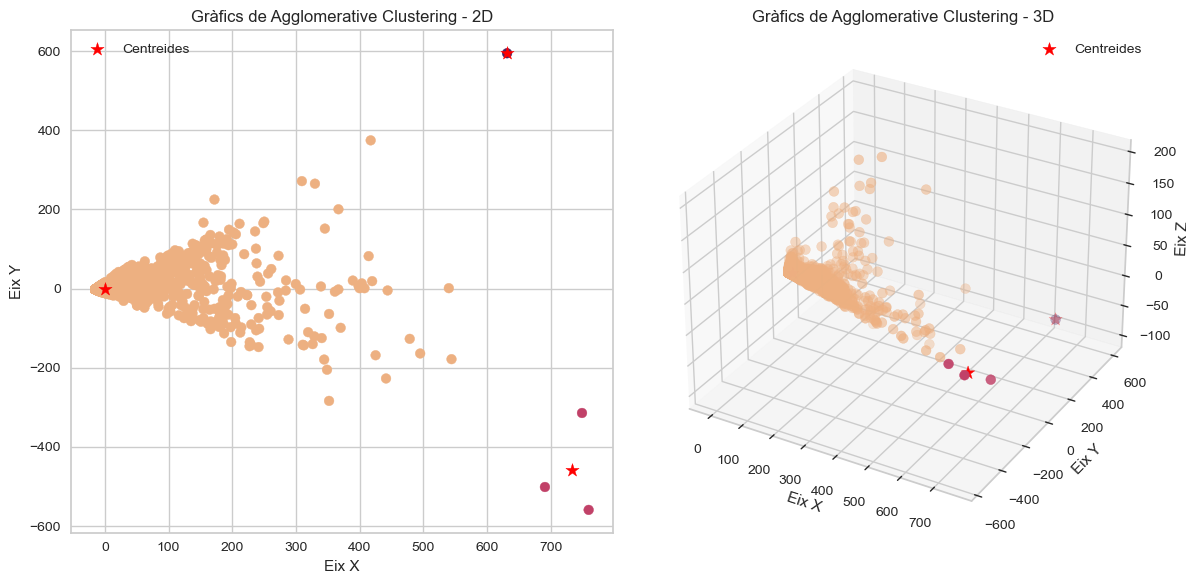

In [51]:
plot_clusters(fb3, cluster_labels, cluster_centers, title='Gràfics de Agglomerative Clustering', xlabel='Eix X', ylabel='Eix Y')

In [52]:
metriques = avaluar_clustering('g', hierarchical_clustering, fb3, metriques, 'Clustering Jeràrquic (Agglomerative)')

In [53]:
metriques[metriques['Model'] == 'Clustering Jeràrquic (Agglomerative)']

,Model,Coeficient de Silueta,Índex de Davies-Bouldin,Índex Calinski-Harabasz,Coeficient Cophenetic,WCSS,BCSS,Anomalies
1,Clustering Jeràrquic (Agglomerative),0.962091,0.13384,593.982671,0.958027,NaN,NaN,357


    Després de provar amb quatre i tres components les metriques empitjoraven amb quatre components però al dendograma es veuen quatre grups diferenciats, llavors 
    
- Coeficient de Silueta: El coeficient de silueta és una mesura de la qualitat de l'agrupació. Un valor més proper a 1 indica una bona separació i cohesió dels grups, cosa que significa que els punts dins de cada grup estan més a prop entre si que dels punts en altres grups. En aquest cas, el coeficient de silueta és de 0.962091, indicant que l'agrupació té una molt bona separació i cohesió.

- Índex de Davies-Bouldin: L'índex de Davies-Bouldin és una mesura de la qualitat de l'agrupació. Un valor més baix indica una millor qualitat de l'agrupació, on els grups estan més separats i els punts dins de cada grup són més similars entre si. En aquest cas, l'índex de Davies-Bouldin és de 0.13384, que és baix i indica una bona qualitat de l'agrupació.

- Índex Calinski-Harabasz: L'índex Calinski-Harabasz és una mesura de la separació entre els grups i la cohesió dins de cada grup. Un valor més alt indica una millor separació entre els grups i una millor cohesió dels punts dins de cada grup. En aquest cas, l'índex Calinski-Harabasz és de 593.982671, que és relativament alt i indica una bona separació dels grups.

- Coeficient Cophenetic: El coeficient Cophenetic és una mesura de la correlació entre la matriu de distàncies original i la matriu de distàncies utilitzada pel clustering jeràrquic. Un valor més proper a 1 indica una bona correlació i una millor representació de les distàncies originals. En aquest cas, el coeficient Cophenetic és de 0.958027, que és relativament alt i indica una bona correlació.

- WCSS: La suma de quadrats dins del cluster (WCSS) és una mesura de la dispersió dels punts dins de cada grup. Com més baix sigui el valor de WCSS, més compactes i similars seran els punts dins de cada grup. En aquest cas, el valor de WCSS és NaN, el qual indica que no es va calcular o no està disponible.

- BCSS: La suma de quadrats entre clusters (BCSS) és una mesura de la separació entre els grups. Com més gran sigui el valor de BCSS en comparació amb WCSS, més separats estaran els grups. En aquest cas, el valor de BCSS és NaN, el qual indica que no es va calcular o no està disponible.

- Anomalies: Aquesta columna indica el nombre de punts que s'han identificat com a anomalies en l'agrupació. En aquest cas, hi ha 357 anomalies detectades.

Els resultats mostren que el model de clustering jeràrquic té una bona separació i cohesió dels grups, amb una alta qualitat d'agrupació i una correlació significativa amb les distàncies originals. També s'han identificat 357 anomalies en les dades utilitzant l'algorisme Local Outlier Factor.

### Dendograma

Un dendrograma és una representació gràfica d'un arbre de jerarquia o agrupament. En el context del clustering jeràrquic, un dendrograma mostra com els elements d'un conjunt de dades s'agrupen i es relacionen entre si.

En un dendrograma, els elements individuals es representen com a fulles a la part inferior, i els grups o clústers es formen a mesura que anem pujant cap a la part superior del gràfic. L'altura de cada unió en el dendrograma representa la distància o similitud entre els grups o elements.

El dendrograma permet visualitzar de manera intuïtiva l'estructura jeràrquica dels grups i ajuda a identificar diferents nivells d'agrupament. També pot proporcionar informació sobre la similitud entre grups i la relació entre diferents subgrups.

In [54]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage

# Calcular la matriu de distàncies entre les mostres utilitzant la distància euclidiana
dist_matrix = pdist(fb3, metric='euclidean')

# Calcular la matriu d'enllaç utilitzant el mètode de Ward
linkage_matrix = linkage(dist_matrix, method='ward')

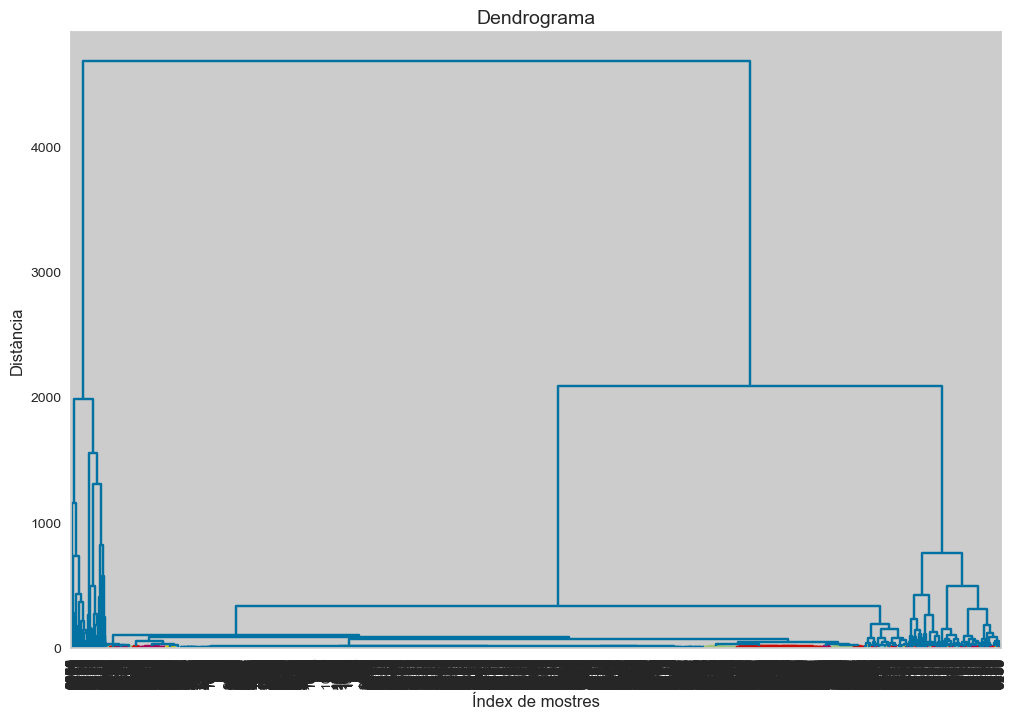

In [55]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12, 8)) # Crear una figura amb la mida especificada

# Generar el dendrograma a partir de la matriu d'enllaç amb el color personalitzat
dendrogram(linkage_matrix, color_threshold=16, labels=None)

# Establir les etiquetes dels eixos x i y i els títols del gràfic
plt.xlabel('Índex de mostres', fontsize=12)
plt.ylabel('Distància', fontsize=12)
plt.title('Dendrograma', fontsize=14)

# Establir el tamany de les etiquetes dels eixos
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show() # Mostrar el dendrograma

## Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [56]:
metriques

,Model,Coeficient de Silueta,Índex de Davies-Bouldin,Índex Calinski-Harabasz,Coeficient Cophenetic,WCSS,BCSS,Anomalies
0,kmeans,0.869805,0.777241,7601.298997,NaN,6.522507e+06,9.392844e+08,762
1,Clustering Jeràrquic (Agglomerative),0.962091,0.133840,593.982671,0.958027,NaN,NaN,357


- Coeficient de Silueta: L'algorisme de Clustering Jeràrquic (Agglomerative) obté un coeficient de silueta de 0.962091, que indica una bona separació i cohesió dels clusters. D'altra banda, l'algorisme K-means té un coeficient de silueta de 0.869805, que també indica una separació i cohesió acceptables dels clusters. En aquest aspecte, l'algorisme de Clustering Jeràrquic sembla obtenir un millor rendiment.

- Índex de Davies-Bouldin: L'algorisme de Clustering Jeràrquic té un índex de Davies-Bouldin de 0.133840, que és més baix que l'índex de Davies-Bouldin de l'algorisme K-means (0.777241). Aquesta diferència suggereix que l'algorisme de Clustering Jeràrquic té una millor separació i cohesió dels clusters.

- Índex Calinski-Harabasz: L'algorisme de Clustering Jeràrquic obté un índex Calinski-Harabasz de 593.982671, que és més alt que l'índex Calinski-Harabasz de l'algorisme K-means (7601.298997). Això indica que l'algorisme de Clustering Jeràrquic té una millor separació dels clusters.

- Anomalies: L'algorisme de Clustering Jeràrquic detecta 357 anomalies, mentre que l'algorisme K-means en detecta 762. Això indica que l'algorisme de Clustering Jeràrquic pot ser més eficaç en la identificació d'anomalies en aquest conjunt de dades.

Tenint en compte aquesta informació addicional, **l'algorisme de Clustering Jeràrquic (Agglomerative) sembla tenir un millor rendiment en comparació amb l'algorisme K-means** en termes de coeficient de silueta, índex de Davies-Bouldin i índex Calinski-Harabasz. També té una menor detecció d'anomalies.